# Kaggle Titanic Data

1. 데이터 세트 학인 : null 값 체크 수정
2. 탐색적 데이타 분석(Exploratory Data Analysis) : 여러 feature들의 개별적 분석, 상관관계 확인, 시각화로 insights 얻기 위함
3. Feature Engineering : one-hot encoding, class 나누기, 구간나누기, 텍스트 데이타 처리등
4. Model 만들기 : sklearn을 사용, tensorflow, pytorch등도 사용
5. 모델 학습 및 예측: train set으로 모델을 학습시킨후 test set으로 prediction
6. 모델 평가: 예측성능이 원하는 수준인지 판단


## 1.데이타셋 확인


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)   # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib의 기본 scheme 말고 seaborn scheme을 
                            # 일일이 graph의 font size를 지정할 필요없이 seaborn의 font_scale을 사용하면 편합니다. 
import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 

In [43]:
df_train = pd.read_csv('./data/titanic/train.csv')
df_test = pd.read_csv('./data/titanic/test.csv')

In [44]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### 컬럼 설명
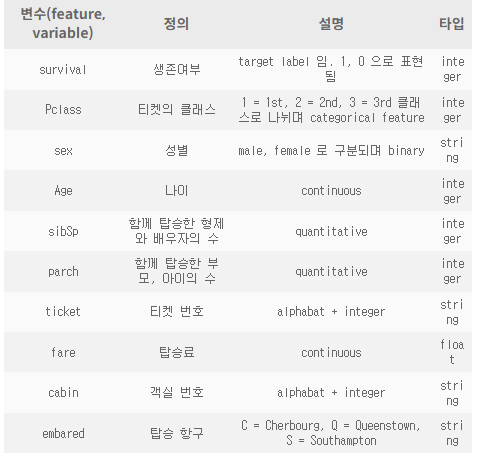

In [46]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [47]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 NULL Data Check

In [48]:
for col in df_train.columns:
    msg = 'column:{:>10}\t Percent of NaN value:{:.2f}%'.format(col, 100*(df_train[col].isnull().sum() /df_train[col].shape[0]))
    print(msg)

column:PassengerId	 Percent of NaN value:0.00%
column:  Survived	 Percent of NaN value:0.00%
column:    Pclass	 Percent of NaN value:0.00%
column:      Name	 Percent of NaN value:0.00%
column:       Sex	 Percent of NaN value:0.00%
column:       Age	 Percent of NaN value:19.87%
column:     SibSp	 Percent of NaN value:0.00%
column:     Parch	 Percent of NaN value:0.00%
column:    Ticket	 Percent of NaN value:0.00%
column:      Fare	 Percent of NaN value:0.00%
column:     Cabin	 Percent of NaN value:77.10%
column:  Embarked	 Percent of NaN value:0.22%


In [49]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100* (df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

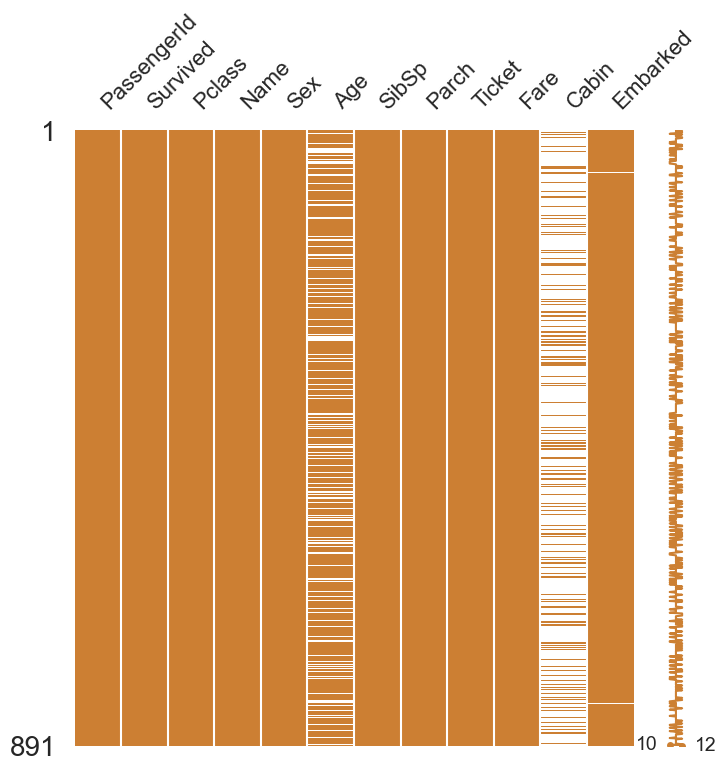

In [50]:
msno.matrix(df = df_train.iloc[:,:], figsize=(8, 8), color = (0.8, 0.5, 0.2))

<AxesSubplot:>

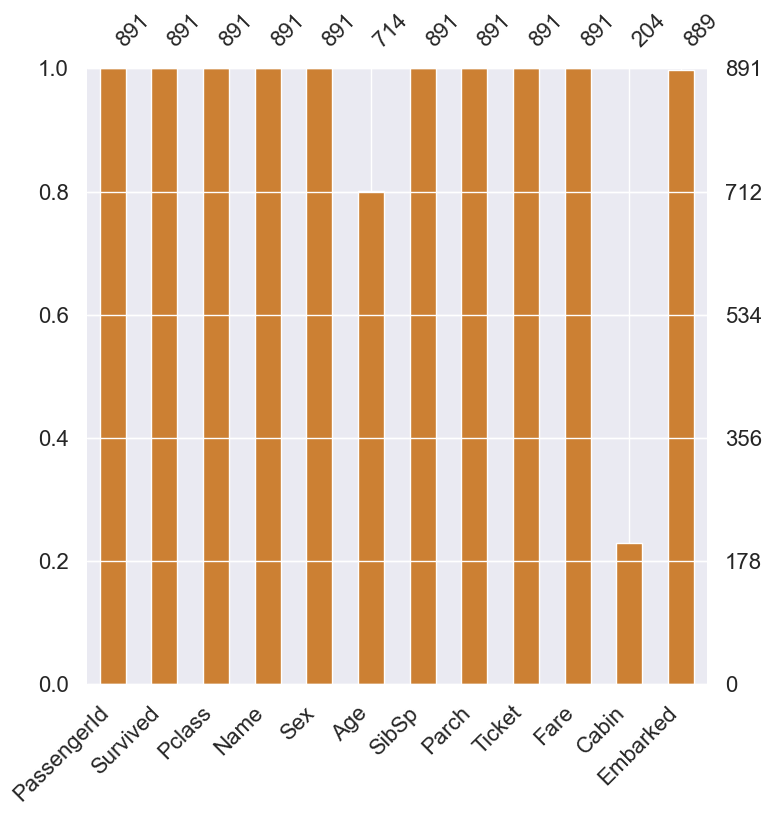

In [51]:
msno.bar(df_train.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

<AxesSubplot:>

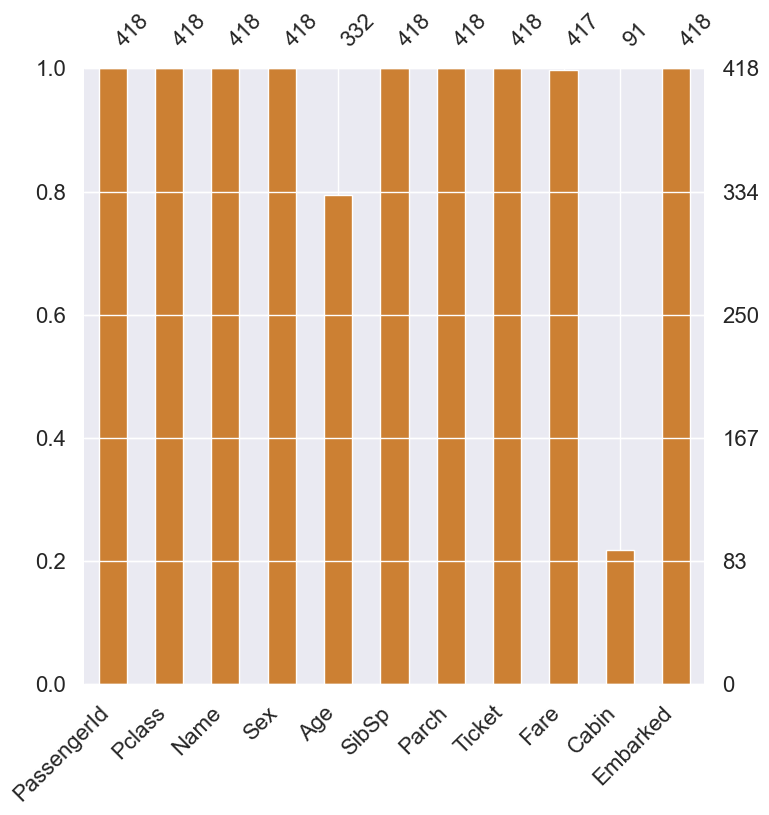

In [52]:
msno.bar(df = df_test.iloc[:,:], figsize=(8,8), color=(0.8,0.5,0.2))

### 1.2 Target label 확인

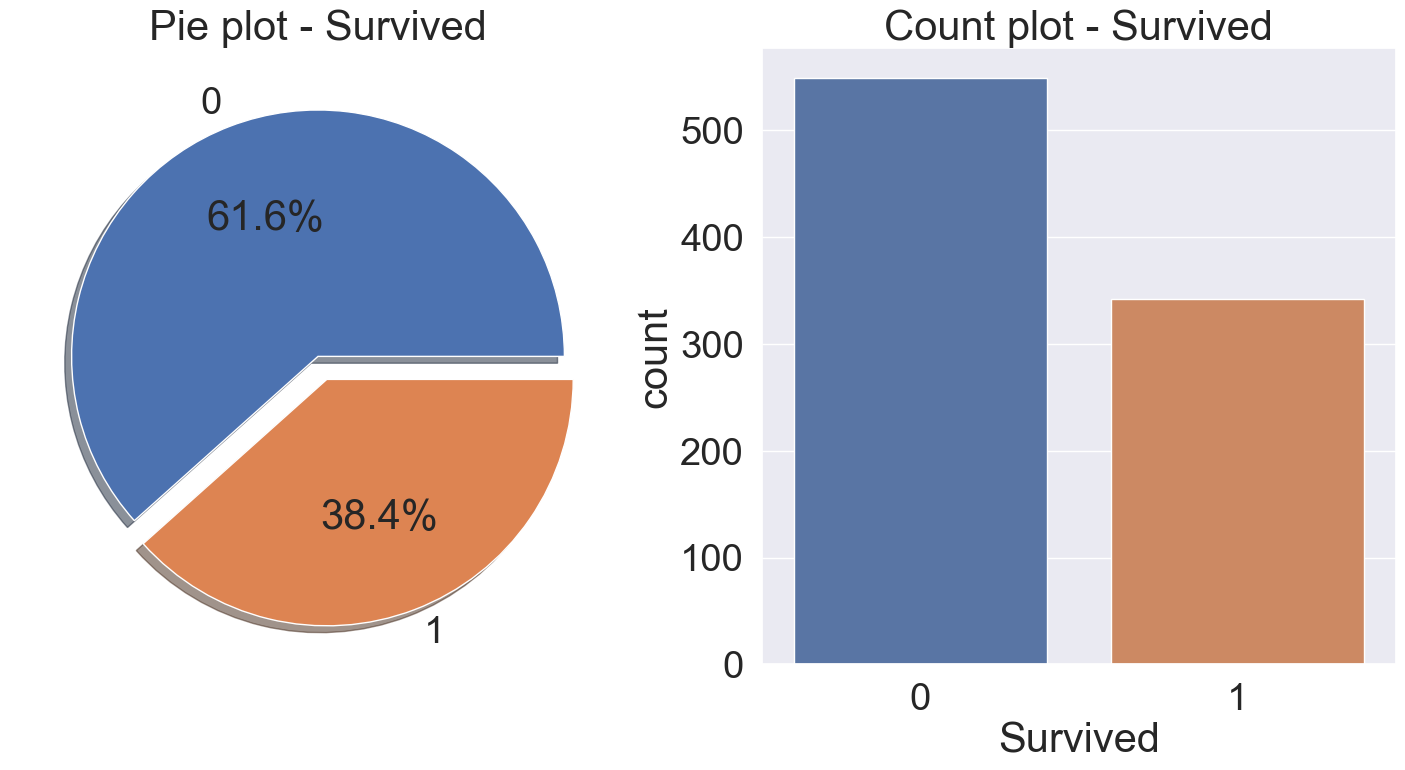

In [53]:
f, ax = plt.subplots(1, 2, figsize = (18,8))
df_train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

## 2.Exploratory data analysis

### 2.1 Pclass

In [54]:
df_train[['Pclass','Survived']].groupby('Pclass', as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [55]:
df_train[['Pclass','Survived']].groupby('Pclass', as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [56]:
pd.crosstab(df_train['Pclass'],df_train['Survived'], margins = True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

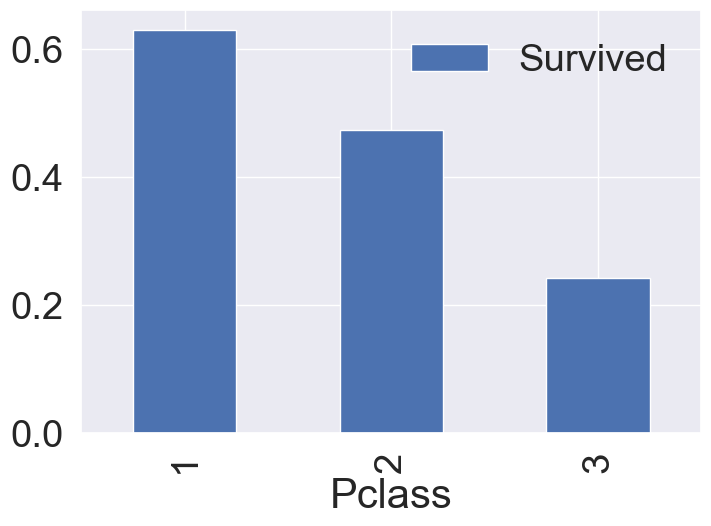

In [57]:
df_train[['Pclass', 'Survived']].groupby('Pclass', as_index= True).mean().sort_values(by='Survived', ascending=False).plot.bar()

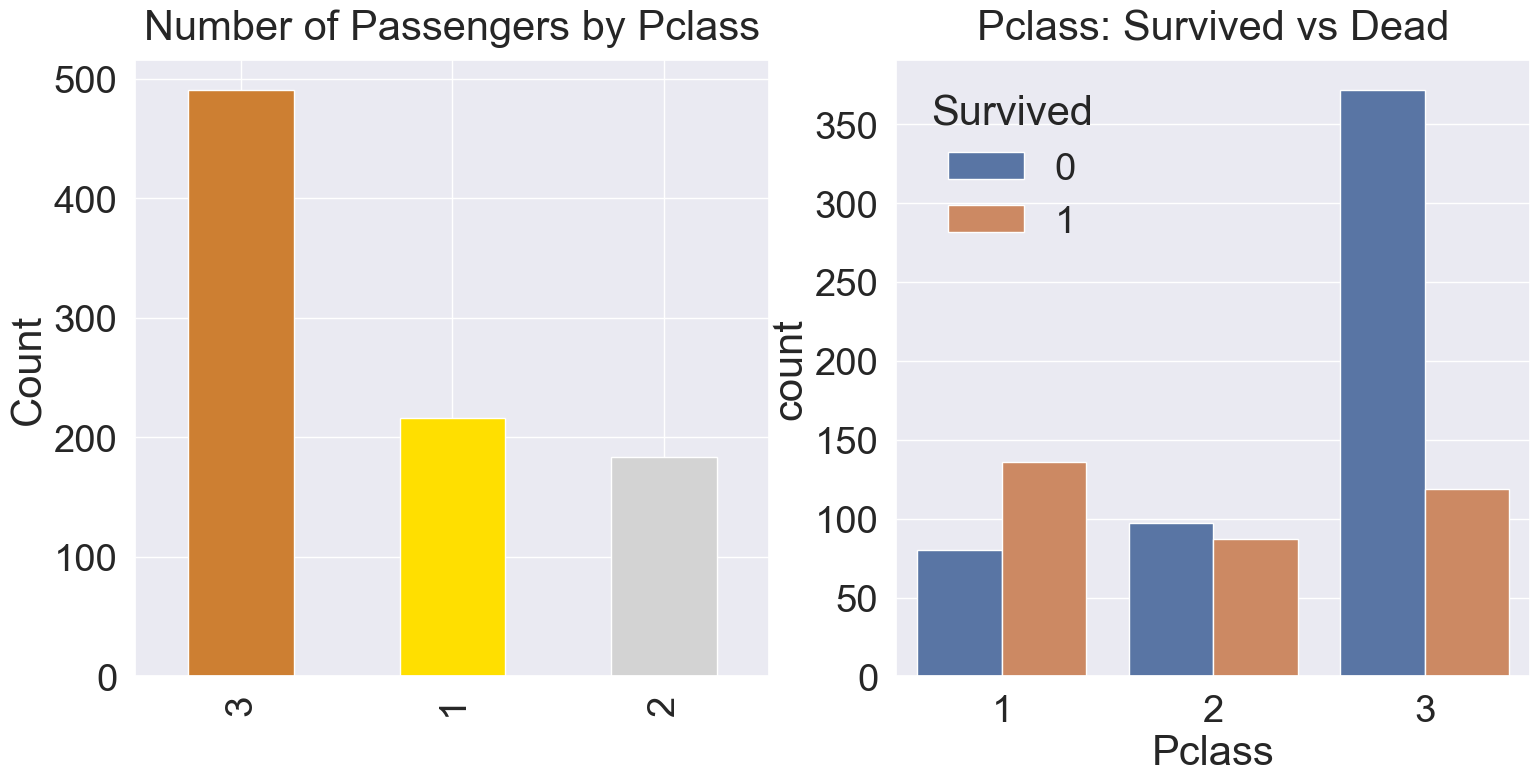

In [58]:
y_position = 1.02
f, ax = plt.subplots(1,2, figsize =(18, 8))
df_train['Pclass'].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', "#D3D3D3"], ax = ax[0])
ax[0].set_title('Number of Passengers by Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

Observation: 
* 클래스가 높을 수록 생존확률이 높다. Pclass 1,2,3 순으로 63%,48%,25%
* Pclass가 생존확률에 큰 영향을 미친다고 생각할 수 있다. 

### 2.2 Sex

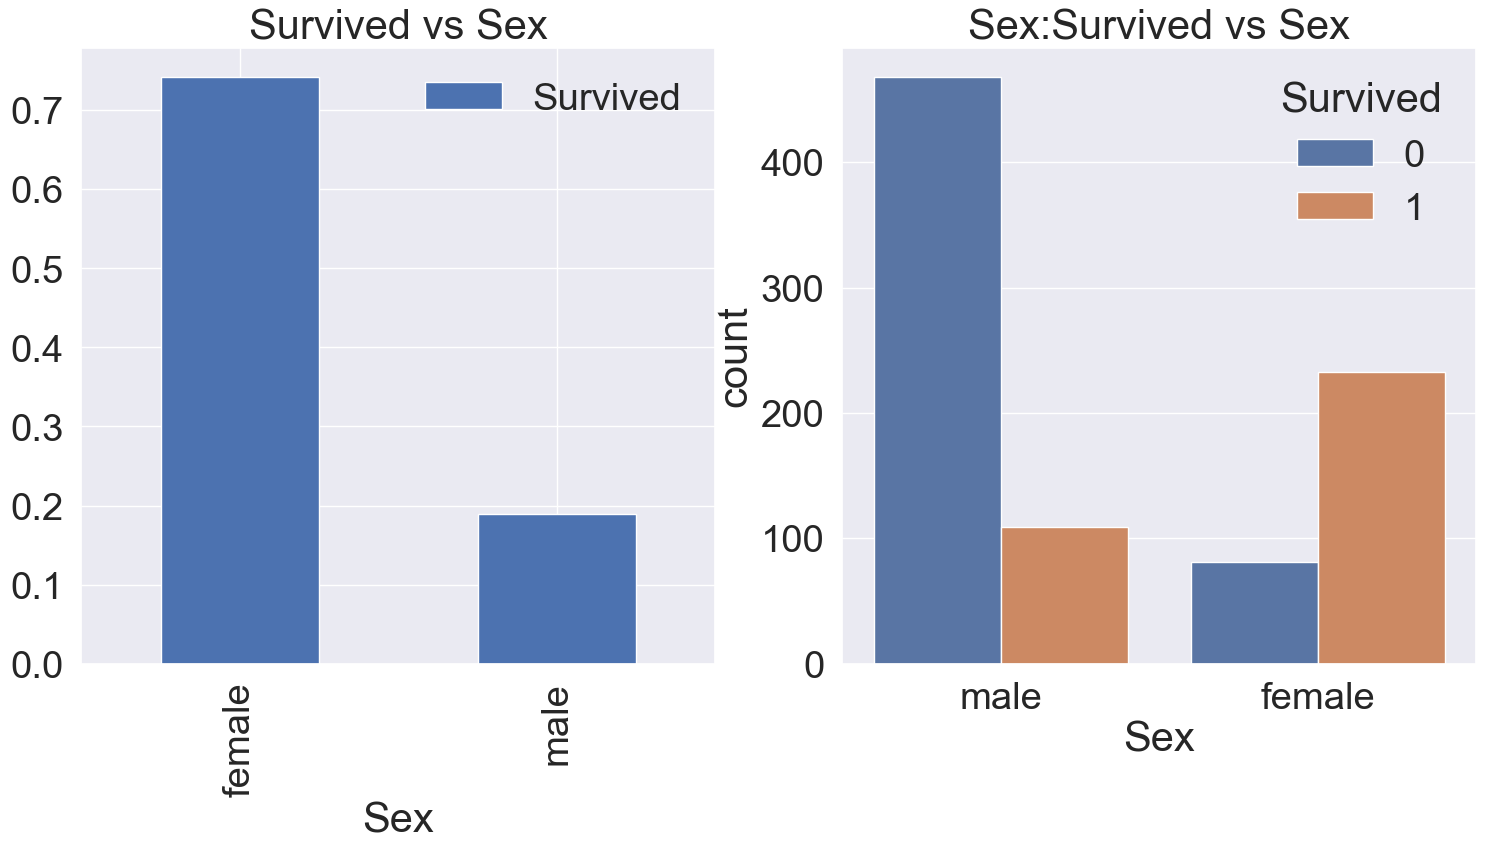

In [59]:
f, ax = plt.subplots(1,2, figsize = (18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived',data=df_train, ax=ax[1])
ax[1].set_title('Sex:Survived vs Sex')
plt.show()

In [60]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived',ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [61]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


Obsesrvation: 여성이 생존 확률이 높다. Sex도 중요한 Feature 중 하나임을 알 수 있다. 

### 2.3 Both Sex and Pclass

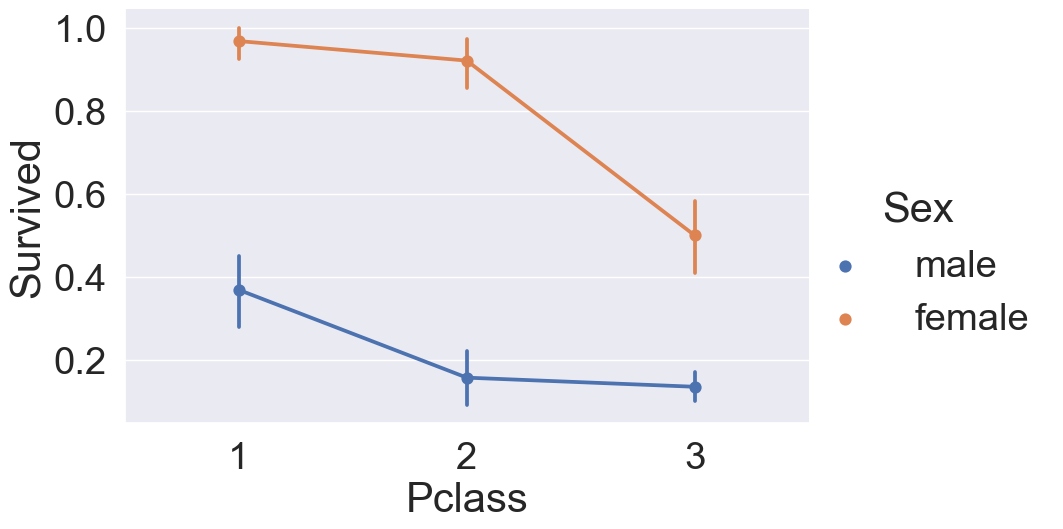

In [62]:
sns.factorplot('Pclass','Survived', hue='Sex', data=df_train, size=6, aspect = 1.5)

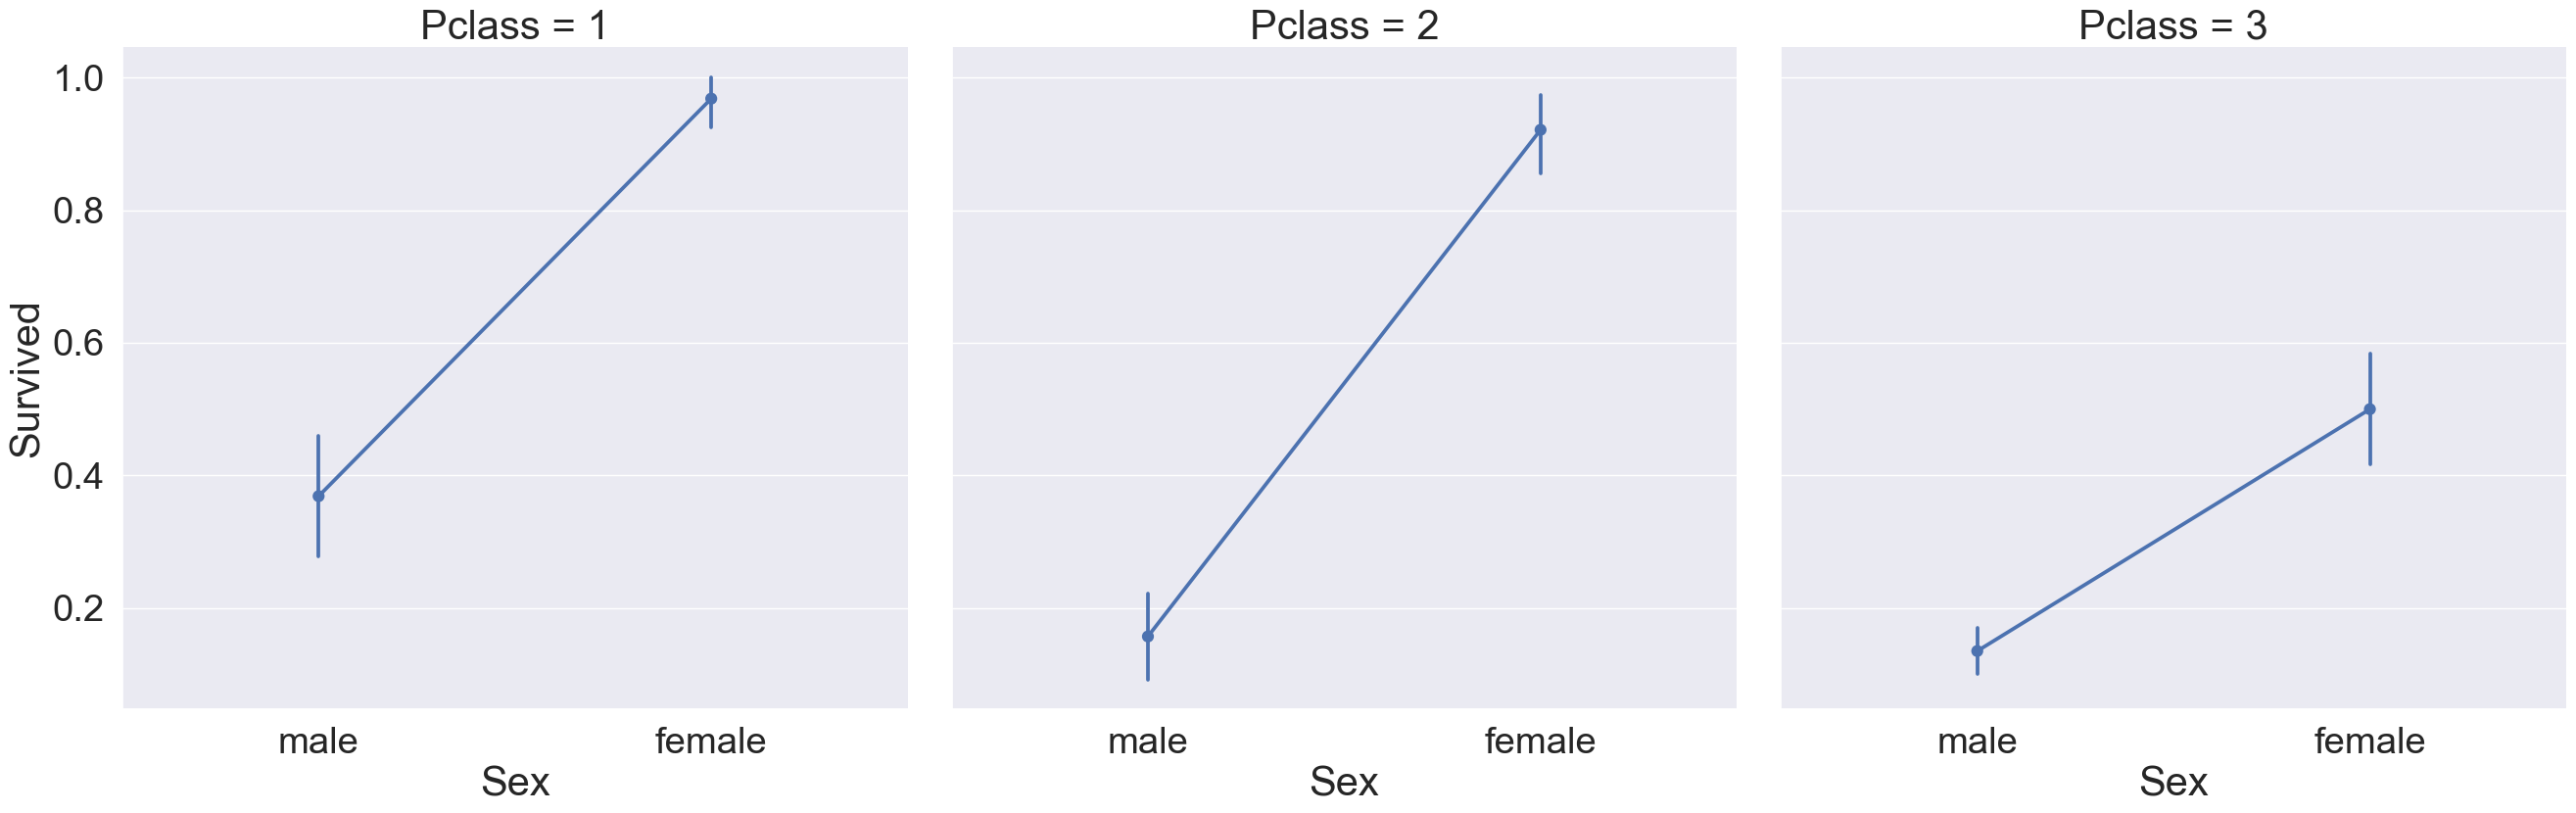

In [63]:
sns.factorplot(x='Sex', y='Survived', col = 'Pclass', data= df_train, satureatio=.5, size =9, aspect=1)

Observation: 
* 모든 클래스에서 여성이 남성보다 생존확률이 높다.
* 남여에 상관없이 클래스가높으면 생존확률이 높다.

### 2.4 Age

In [64]:
print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑습객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 나이 어린 탑습객: 0.4 Years
탑승객 평균 나이: 29.7 Years


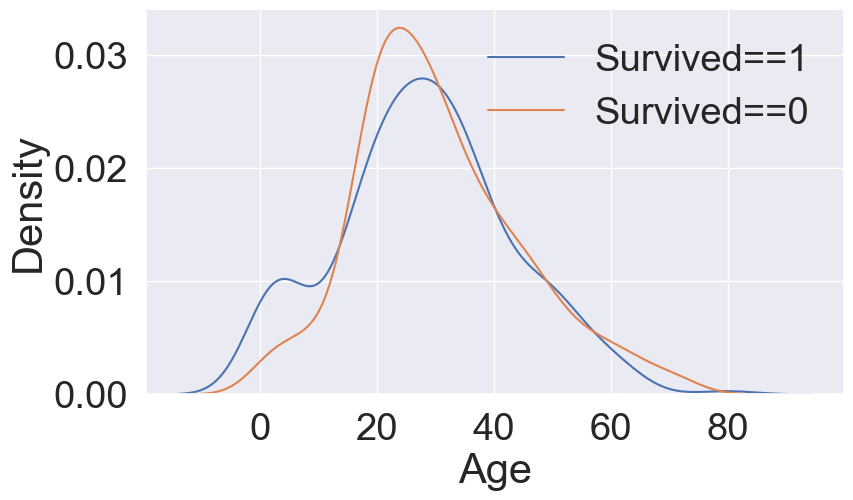

In [65]:
#생존에 따를 Age Histogram
fig, ax = plt.subplots(1,1,figsize =(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived==1', 'Survived==0'])
plt.show()

<AxesSubplot:ylabel='Density'>

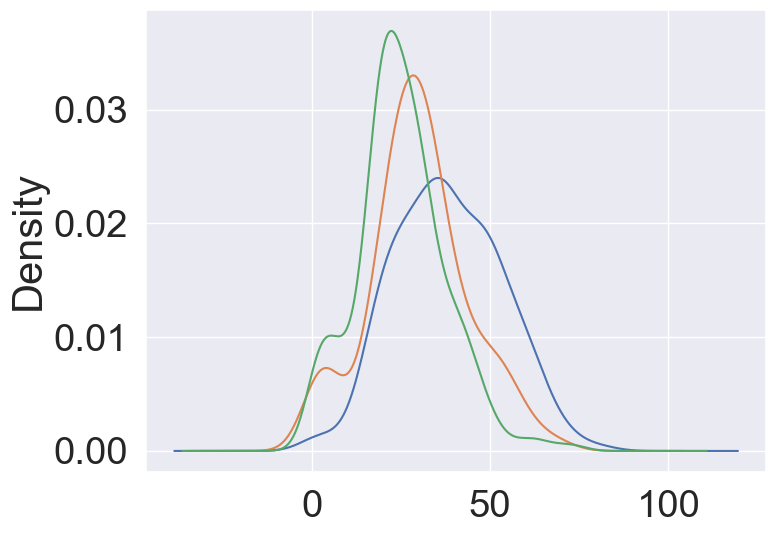

In [66]:
#Age distribution with classes
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

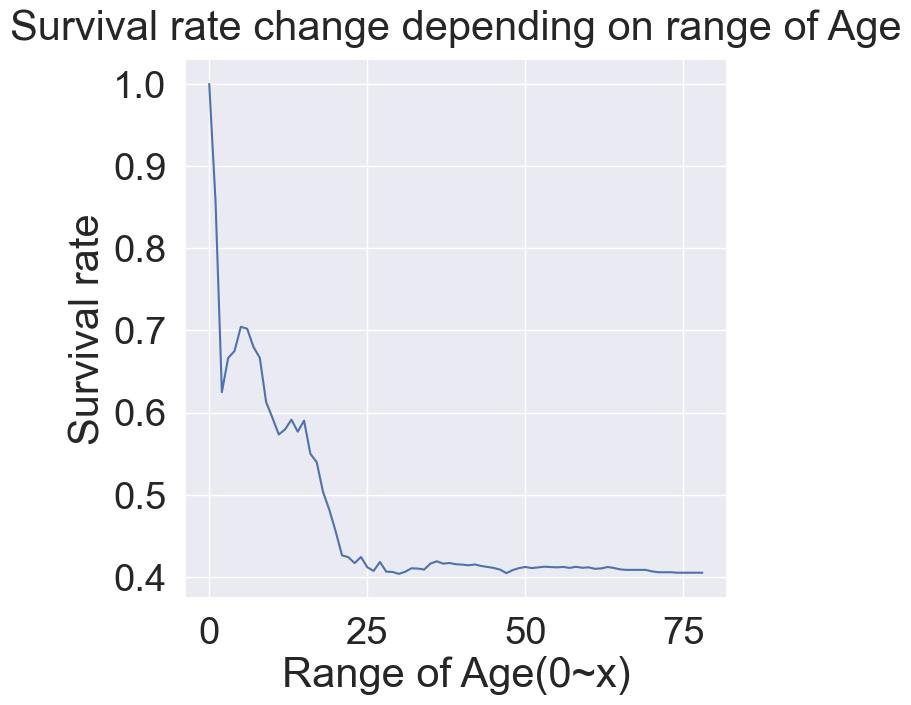

In [67]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age']< i]['Survived'].sum()/len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()


Observation: 나이가 어릴 수록 생존 확률이 높다. 나이가 중요한 feature가 될 수 있다. 

### 2.5 Pclass, Sex, Age

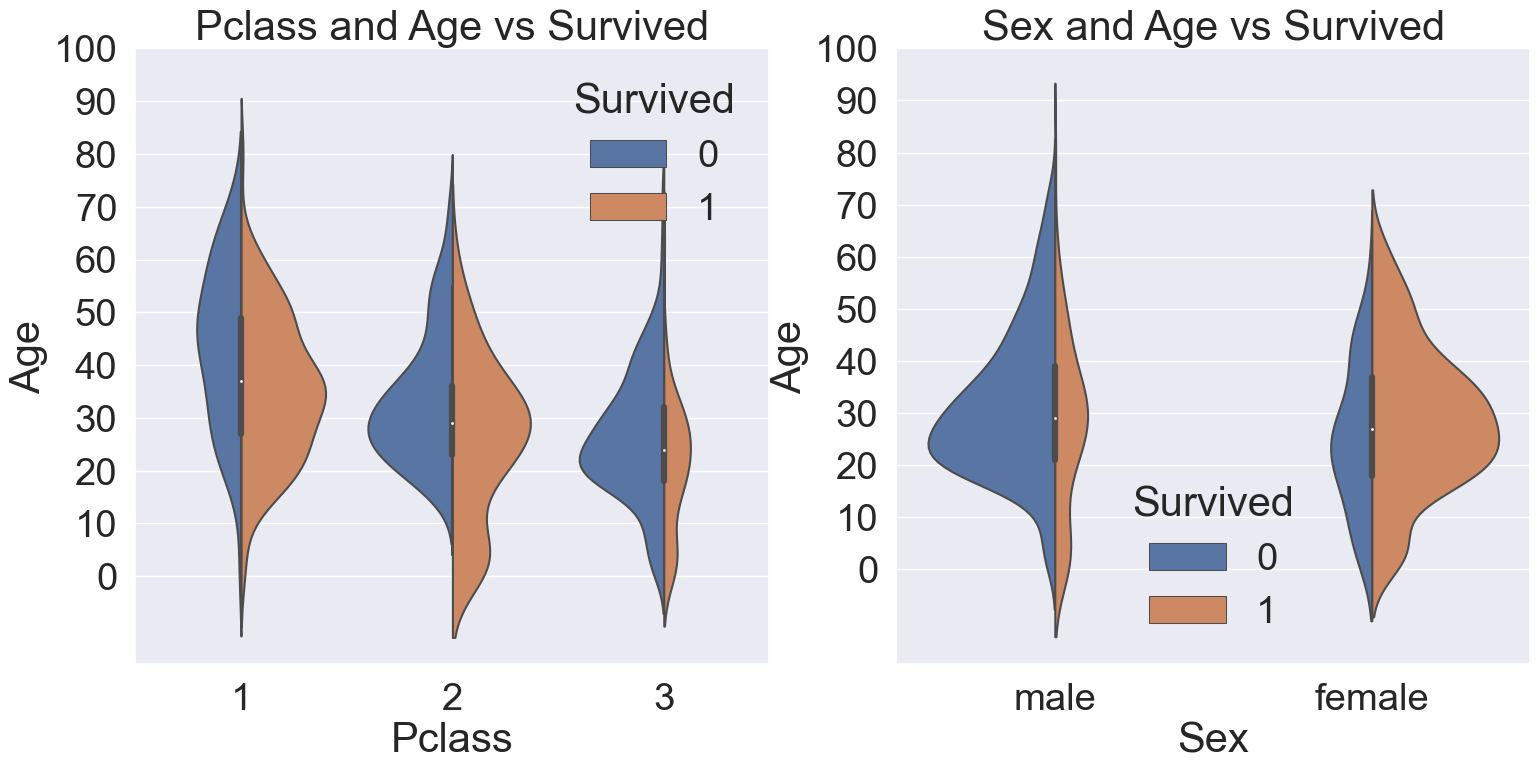

In [68]:
f,ax = plt.subplots(1,2,figsize =(18, 8))
sns.violinplot("Pclass", "Age", hue ="Survived", data = df_train, scale='count', split = True, ax=ax[0])
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age",hue="Survived", data = df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

Observation: 여성과 어린아이들을 먼저 챙겨서 생존률이 높은 것으로 보인다.

### 2.6 Embarked

<AxesSubplot:xlabel='Embarked'>

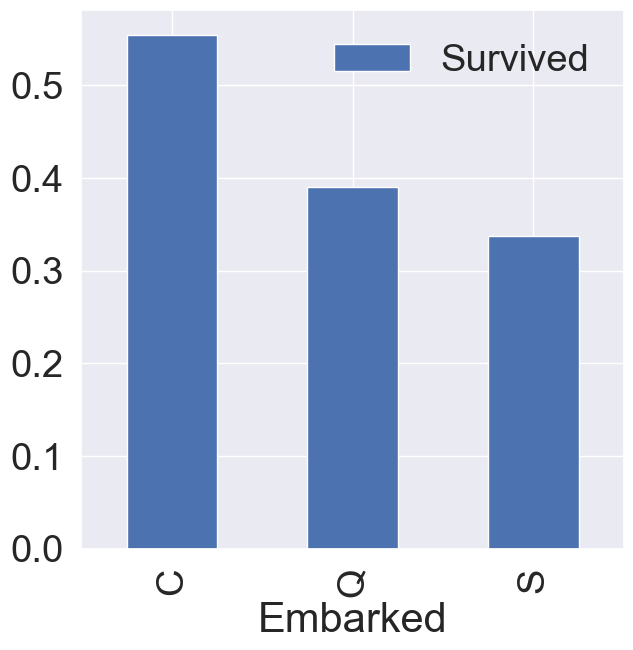

In [69]:
#탑승한 항구엥 따른 생존율
f, ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'],as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

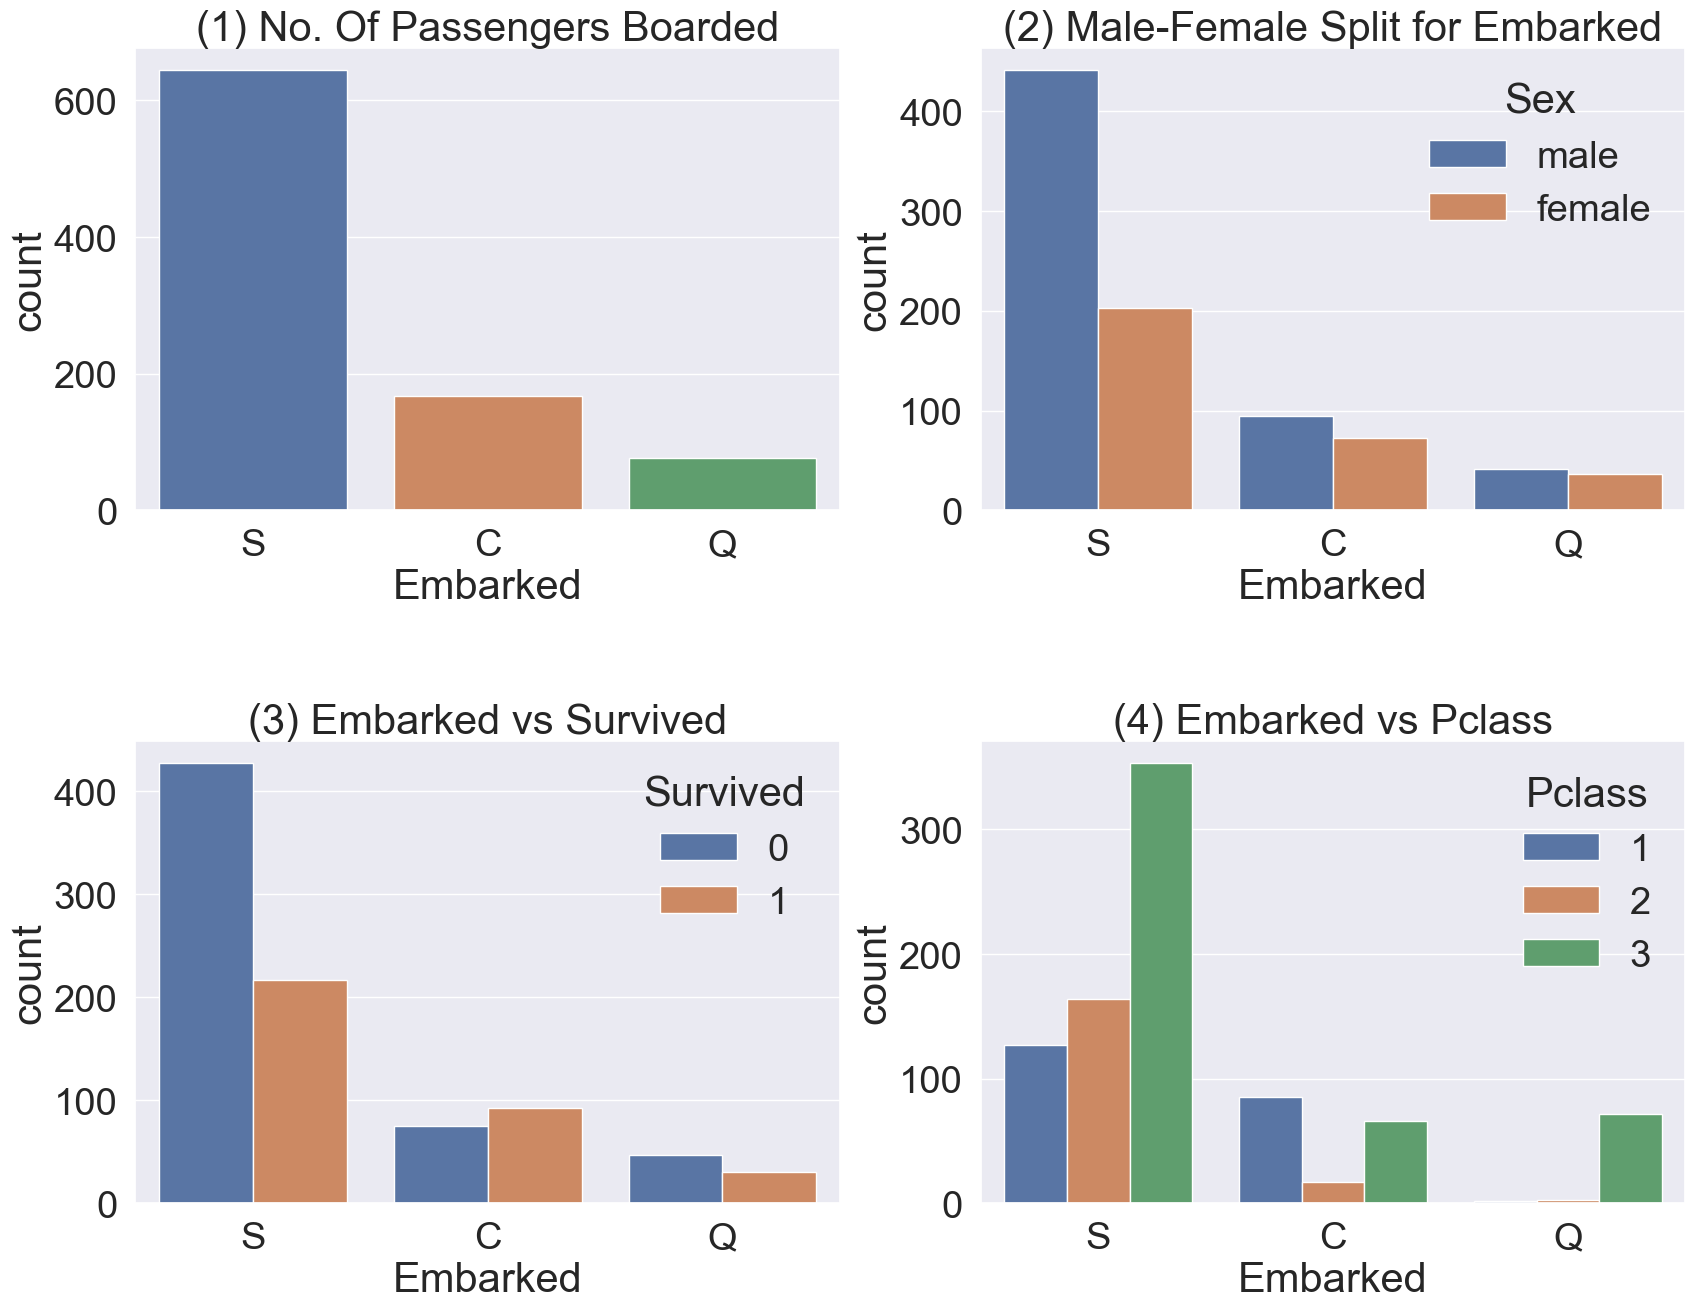

In [70]:
f, ax = plt.subplots(2,2, figsize =(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data= df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Observation :
* Figure(1) - S 에서 가장 많은 승객 탑승
* Figure(2) - C와 Q는 남녀 비율 비슷, S는 남성의 비율 높음
* Figure(3) - 생존확률이 S는 많이 낮음
* Figure(4) - C가 생존확률이 높은 건 높은 등급의 클래스가 많아서임

### 2.7 Family - Sibsp(형재 자매) + Parch(부모, 자녀)

In [71]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] +1

In [72]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


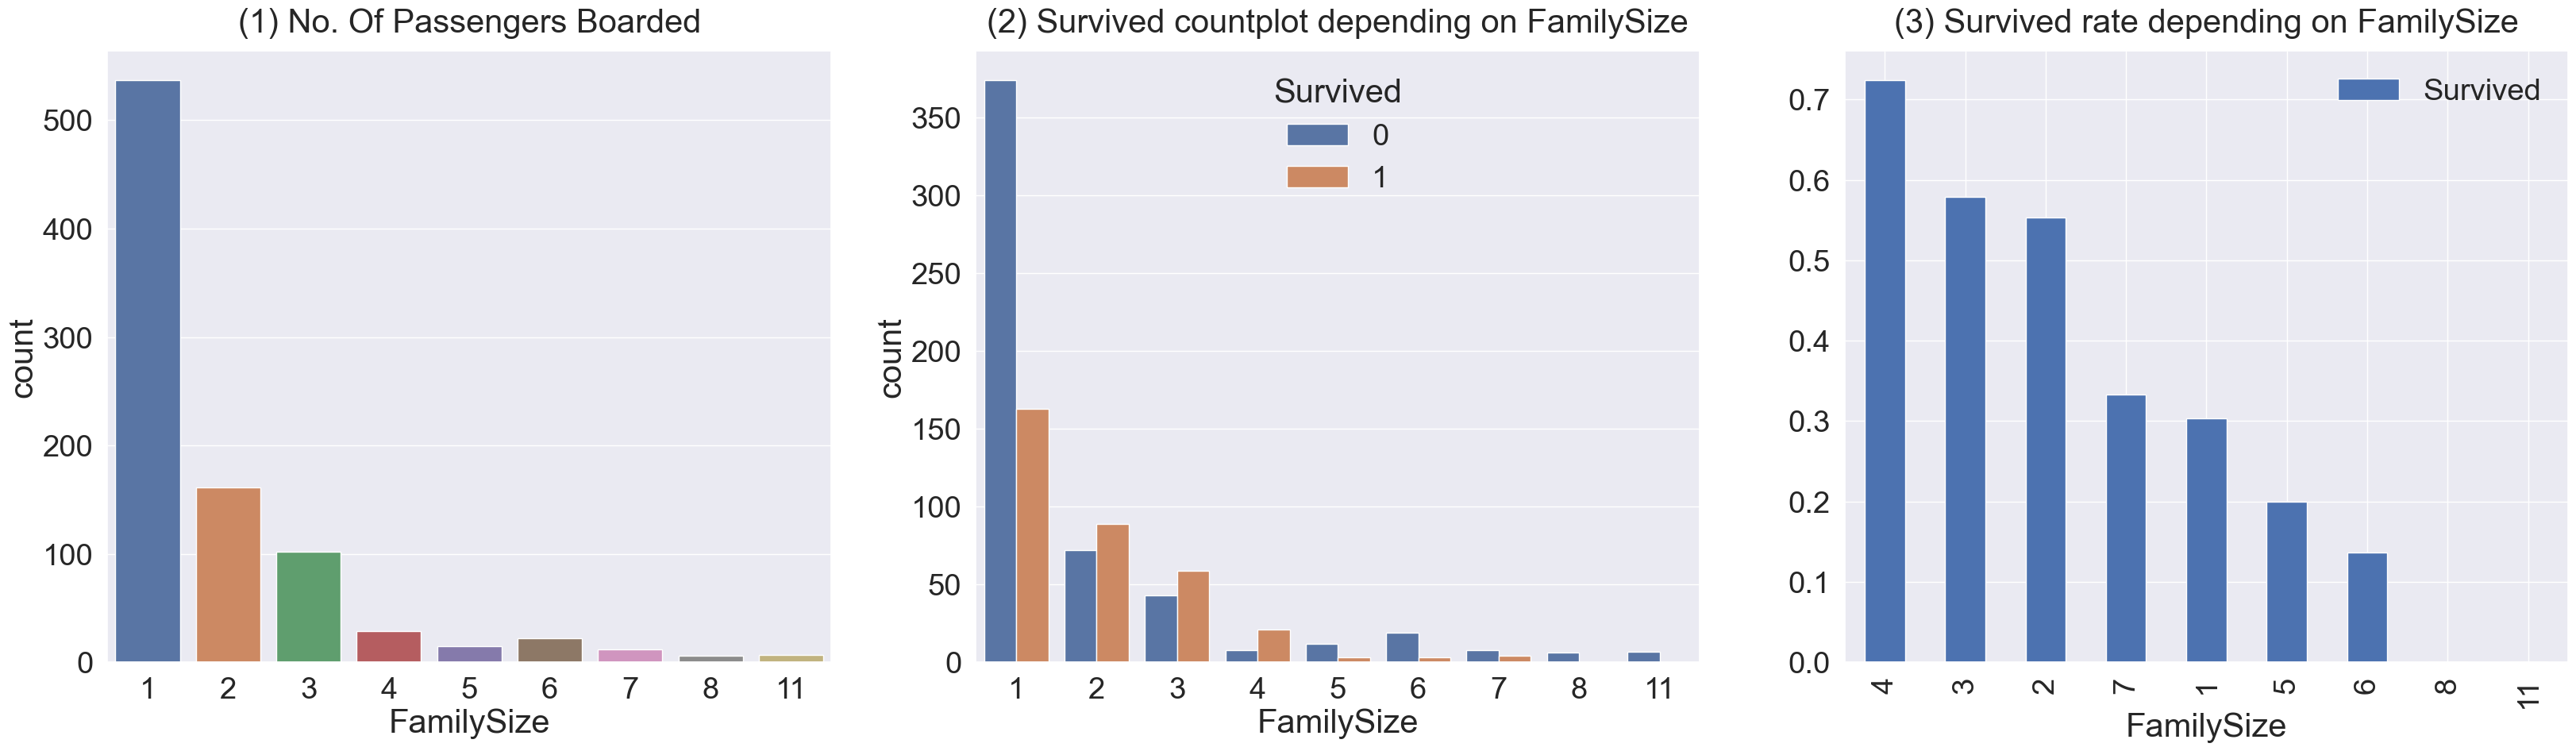

In [73]:
f, ax = plt.subplots(1,3, figsize =(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize','Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived',ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Observation: 가족이 4명인 경우 가장 생존확률이 높음. 가족이 많을 수록 생존확률이 낮아짐

### 2.8 Fare

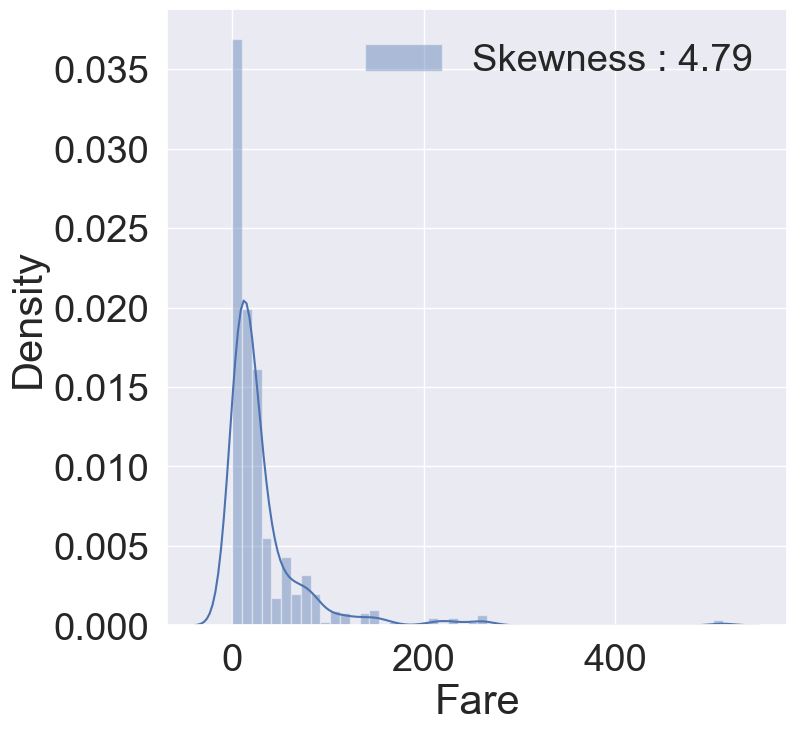

In [74]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
g=sns.distplot(df_train['Fare'], color='b', label ='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

Observation
* Distribution이 매우 비대칭, 자칫 모델이 몇개 없는 outlier을 민감하게 반응할 수 있다. log로 정규화 필요

In [75]:
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

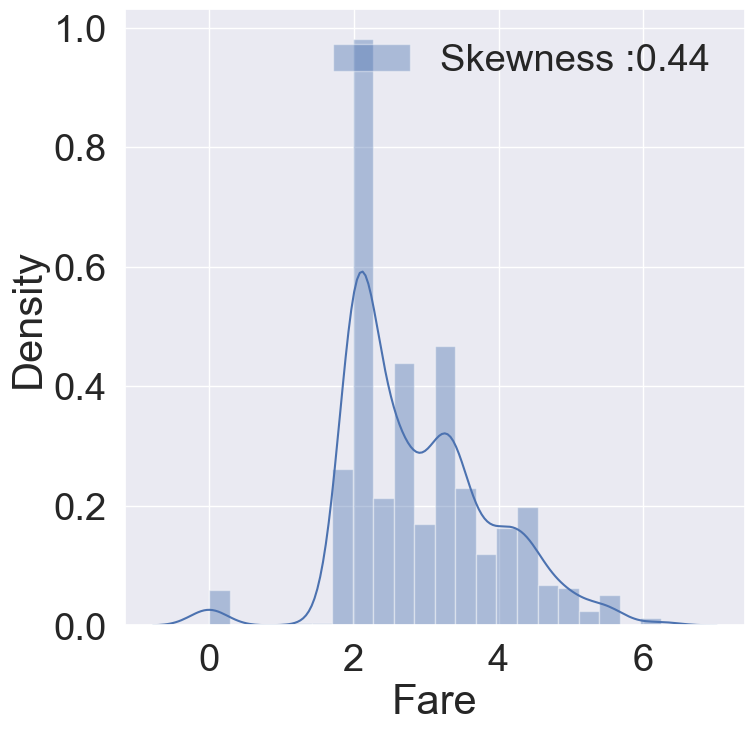

In [76]:
fig, ax = plt.subplots(1,1, figsize = (8,8))
g = sns.distplot(df_train['Fare'], color = 'b', label ='Skewness :{:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')

Observation: 
* Log 함수로 정규화 시켜 비대칭성이 사라졌다. (Feature Engineering)
* 모델을 학습시키기 위해, 그리고 그 모델의 성능을 높이기 위해 feature 들에 여러 조작을 가하거나, 
* 새로운 feature를 추가하는 것을 feature engineering 이라고 한다.

### 2.9 Cabin

In [77]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1


Observation: 80%데이타가 NaN이라 모델에 포함시키지 않음

### 2.10 Ticket

In [78]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Observation: 추후에 생각

# 기타

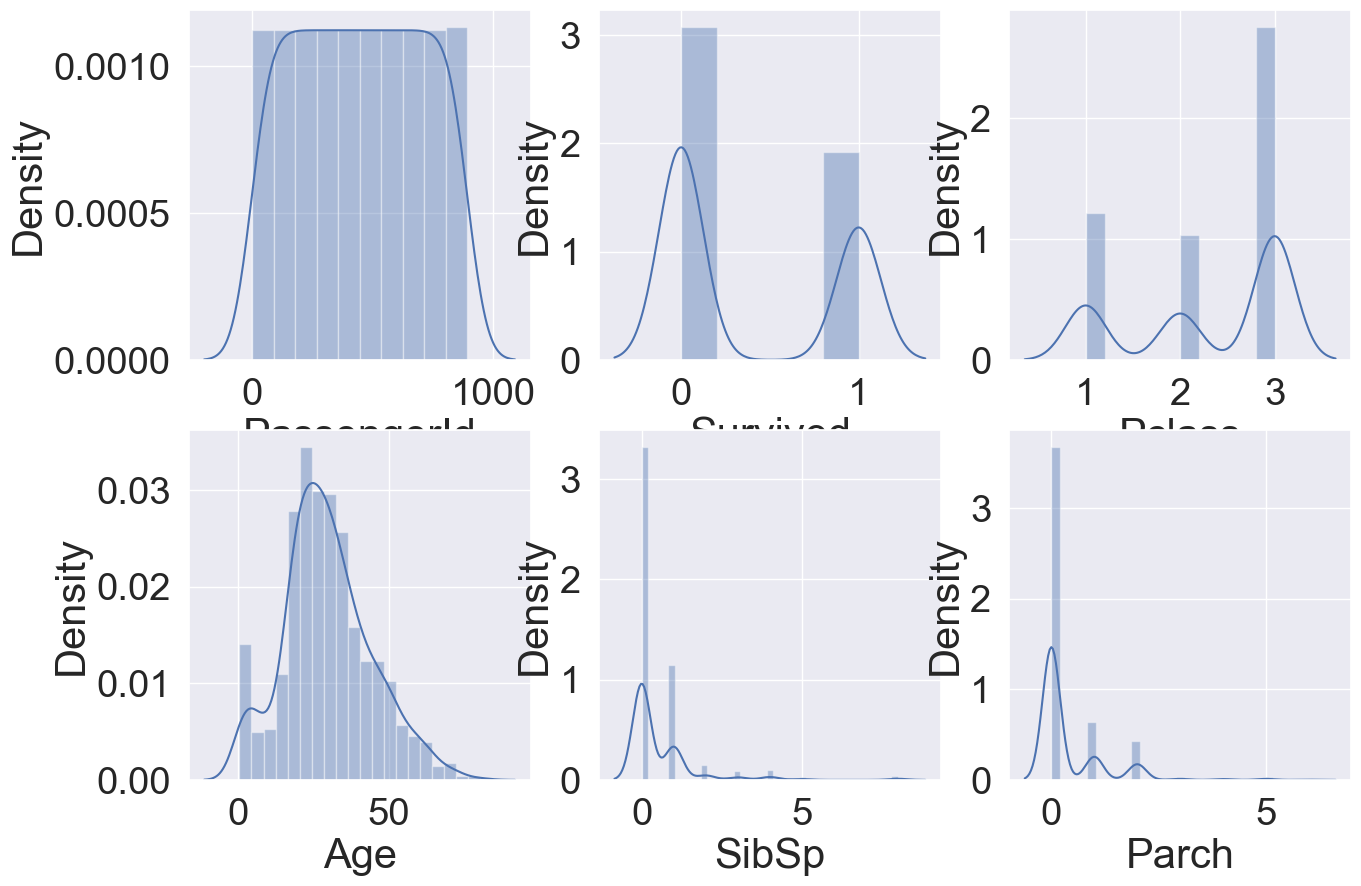

In [79]:
def plot_hist(df):
    numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numeric = []
    for col in df.columns:
        if df[col].dtype in numeric_dtypes:
            numeric.append(col)
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    for axes, col in zip(axes.flatten(), df[numeric]):
        sns.distplot(df[col], ax=axes, kde=True)
        
plot_hist(df_train)

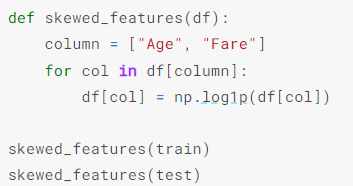

In [80]:
#Null data check
null_columns = df_train.columns[df_train.isnull().any()]
print(df_train[null_columns].isnull().sum())

Age         177
Cabin       687
Embarked      2
dtype: int64


In [81]:
# Categorize column vs numeric columns
categorical_cols = [cname for cname in df_train.columns if
                    df_train[cname].dtype == "object"]

numerical_cols = [cname for cname in df_train.columns if 
                df_train[cname].dtype in ['int64', 'float64']]

print(f'We have {len(categorical_cols)} categorical columns: {categorical_cols}')
print(f'We have {len(numerical_cols)} numerical columns: {numerical_cols}')

We have 5 categorical columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
We have 8 numerical columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']


In [82]:
# Extract title from name
X_train = df_train.copy()
X_test = df_test.copy()
def get_title(name: str) -> str:
    return name.split(',')[1].split()[0].rstrip('.')


X_train['Title'] = X_train['Name'].apply(get_title)
X_test['Title'] = X_test['Name'].apply(get_title)

# clean rare title names
start_min = 10
accepted_title_name = (X_train['Title'].append(X_test['Title']).value_counts() >= start_min)

X_train['Title'] = X_train['Title'].apply(lambda title: title if accepted_title_name.loc[title] == True else 'Misc')
X_test['Title'] = X_test['Title'].apply(lambda title: title if accepted_title_name.loc[title] == True else 'Misc')

In [83]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr


In [87]:
#Handle categorical columns
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder

# cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']

# ct = ColumnTransformer([('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_cols)], 
#                        remainder="passthrough")

# OH_X_train = ct.fit_transform(X_train)
# OH_X_test = ct.transform(X_test)

# # get the feature names
# feature_names = ct.get_feature_names_out()

# OH_X_train = pd.DataFrame(OH_X_train, columns=feature_names)
# OH_X_test = pd.DataFrame(OH_X_test, columns=feature_names)

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'FamilySize'}>, <AxesSubplot:>]],
      dtype=object)

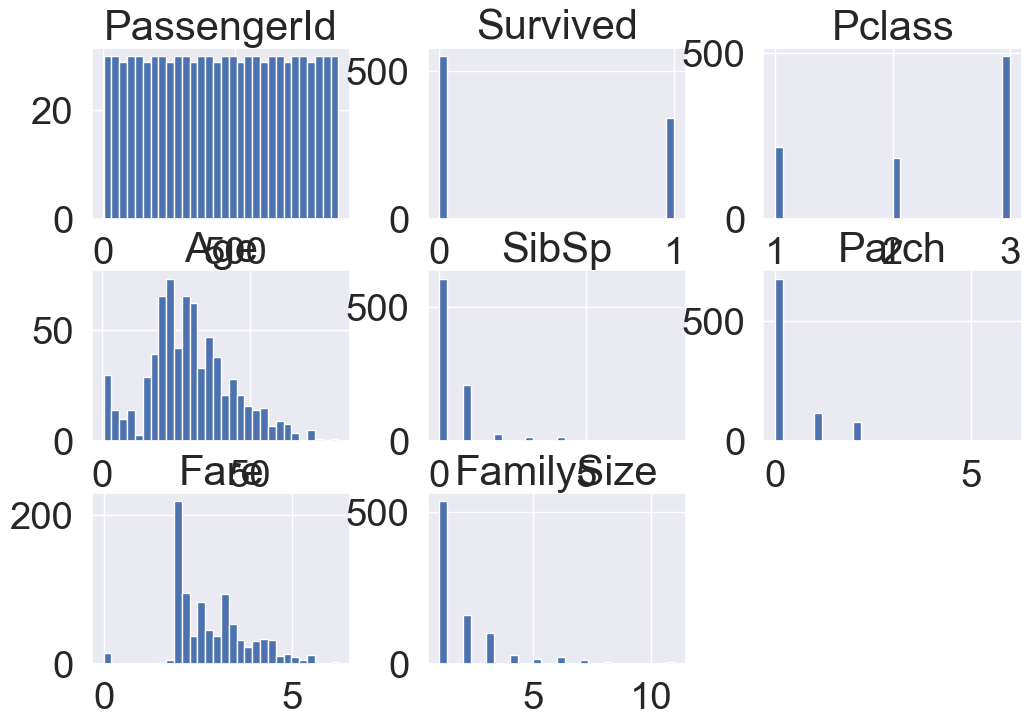

In [91]:
X_train.hist(bins=30, figsize=(12, 8))

<AxesSubplot:ylabel='Frequency'>

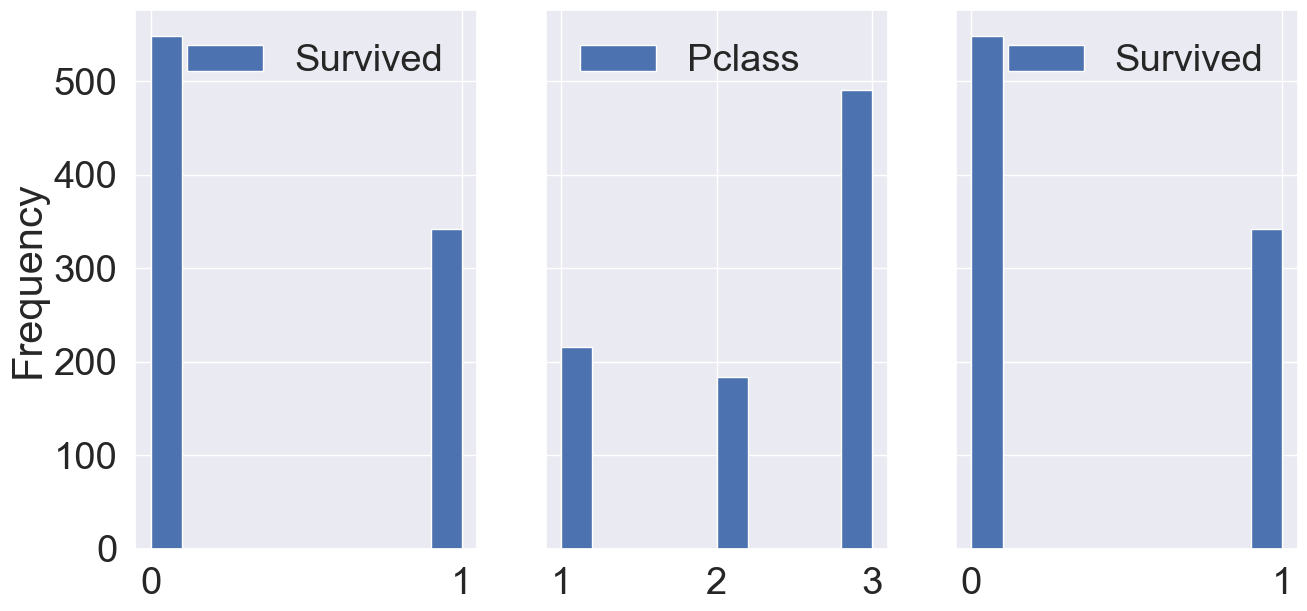

In [92]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15, 7))
X_train.plot.hist(x='Age',y ='Survived',ax = axes[0])
X_train.plot.hist(x='Survived',y ='Pclass',ax = axes[1])
X_train.plot.hist(x='Fare',y ='Survived',ax = axes[2])

In [102]:

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'most_frequent')
X_train[['Embarked']] = imp.fit_transform(X_train[['Embarked']])

imp = SimpleImputer(strategy = 'mean')
X_train[['Age']] = imp.fit_transform(X_train[['Age']])

In [99]:
# Encording 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
X_train['Sex'] = encoder.fit_transform(X_train['Sex'])
X_train['Embarked'] = encoder.fit_transform(X_train['Embarked'])

In [100]:
X_train[X_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title


In [101]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,Mr
